# Assignment 2: Sequence Alignment
In this Python notebook, you'll dive into sequence alignment, key concepts in bioinformatics. The notebook is structured with two types of tasks:
* Challenges: Python programming exercises
* Questions: Conceptual understanding

Your primary goal is to complete the Challenges and answer the Questions.

Once you've finished, please upload a ZIP file containing:
1. The iPython notebook with your solutions for challenges.
2. A PDF report with your answers to the questions and solutions to the questions.
3. Name the ZIP file HW2_{student_id}.zip (e.g., HW2_403112XXX.zip).

This assignment consists of 9 challenges and 4 questions, with a total of **250** points plus **30** bonus points.

## Pairwise Sequence Alignment
Sequence alignment is a fundamental bioinformatics technique used to compare biological sequences (DNA, RNA, or protein) and identify regions of similarity. In this section, you will implement both global and local alignment techniques to align sequences and uncover their similarities.

## Challenge (10 Points)
Write a Python function to visualize pairwise sequence alignments by highlighting matches, mismatches, and gaps. In the output:
* A `|` symbol should indicate a match between aligned characters.
* A `.` symbol should indicate a mismatch between aligned characters.
* A `space`  should represent a gap (either in `seq1` or `seq2`).

as example:
```
G-ATTACA
| |.||| 
GCACTAC-
```

In [3]:
def display_alignment(seq1, seq2):
    """
    Visualizes pairwise sequence alignment by displaying aligned sequences
    with symbols that denote matches, mismatches, and gaps.
    
    Parameters:
    seq1 (str): The first aligned sequence with potential gaps represented by '-'.
    seq2 (str): The second aligned sequence with potential gaps represented by '-'.
    
    Output:
    Prints the aligned sequences along with a third line of symbols:
        - '|' for matches between aligned characters.
        - '.' for mismatches.
        - ' ' (space) for gaps.
    """
        
    match_line = ""  # we need to this for holding the third line of symbols
    
    for char1, char2 in zip(seq1, seq2):
        if char1 == char2 and char1 != '-':
            match_line += '|'
        elif char1 == '-' or char2 == '-':
            match_line += ' '
        else:
            match_line += '.'
    
    # Print the sequences and match line
    print(seq1)
    print(match_line)
    print(seq2)

# Example usage
seq1 = "G-ATTACA"
seq2 = "GCACTAC-"
display_alignment(seq1, seq2)

G-ATTACA
| |.||| 
GCACTAC-


## Challenge (30 Points)

### Needleman-Wunsch Algorithm for Global Sequence Alignment
The Needleman-Wunsch algorithm is a fundamental method in bioinformatics used for aligning two sequences globally, which means it attempts to align the entirety of both sequences. It is particularly useful in cases where we want to find the optimal alignment of sequences of similar length. The algorithm works by scoring matches, mismatches, and gaps to create an optimal alignment.

#### Steps:
1. **Matrix Initialization:** The algorithm starts by creating a scoring matrix with dimensions `(len(seq1)+1, len(seq2)+1)`, where the first row and column represent the alignment of gaps. The first row and column are initialized with incremental gap penalties, as aligning a sequence to gaps introduces penalties.


2. **Matrix Filling:** Next, each cell in the matrix is filled based on three potential operations:
    * Match/Mismatch: If characters from both sequences align.
    * Deletion: If a gap is introduced in the second sequence.
    * Insertion: If a gap is introduced in the first sequence.

3. **Traceback:** Once the matrix is filled, a traceback is performed starting from the bottom-right corner of the matrix. By tracing back the path of highest scores, we generate the aligned sequences, introducing gaps where necessary to maintain alignment.

In [4]:
def get_match_score(char1, char2, MATCH_SCORE=1, MISMATCH_SCORE=-1):
    ## this return MATCH_SCORE if characters match, otherwise return MISMATCH_SCORE.
    return MATCH_SCORE if char1 == char2 else MISMATCH_SCORE


In [29]:
import numpy as np

def needleman_wunsch(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2):
    """
    Performs global alignment using the Needleman-Wunsch algorithm.
    
    Parameters:
        seq1 (str): The first DNA sequence.
        seq2 (str): The second DNA sequence.
        MATCH_SCORE (int): The score for a match.
        MISMATCH_SCORE (int): The score for a mismatch.
        GAP_PENALTY (int): The penalty for a gap.

    Returns:
        (str, str): The aligned sequences align1 and align2.
    """

    # === Task 1: Initialize the scoring matrix with gap penalties in the first row and column. === 
    n, m = len(seq1), len(seq2)
    score_matrix = np.zeros((n + 1, m + 1))
    # wrtie your code here
    for i in range(n + 1): # filling the column of 0
        score_matrix[i][0] = i * GAP_PENALTY
    for j in range(m + 1):# filling the row of 0
        score_matrix[0][j] = j * GAP_PENALTY


    # === Task 2: Fill the scoring matrix based on match, mismatch, and gap penalties. === 
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # write your code here to calculate match, delete, and insert score
            match_score = 0
            delete_score = 0
            intert_score = 0
            match_score = score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE)
            delete_score = score_matrix[i - 1][j] + GAP_PENALTY
            insert_score = score_matrix[i][j - 1] + GAP_PENALTY
            score_matrix[i][j] = max(match_score, delete_score, insert_score)



    # === Task 3: Traceback to get the aligned sequences. === 
    align1, align2 = '', ''
    # write your code here
    i, j = n, m
    while i > 0 or j > 0:
#         get_match_score = get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE)
        if i > 0 and j > 0 and score_matrix[i][j] == score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif i > 0 and score_matrix[i][j] == score_matrix[i - 1][j] + GAP_PENALTY:
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        elif j > 0 and score_matrix[i][j] == score_matrix[i][j - 1] + GAP_PENALTY:
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1


    return align1, align2

In [30]:
# Example usage
seq1 = "GATTACA"
seq2 = "GCACTAC"

align_seq1, align_seq2 = needleman_wunsch(seq1, seq2)
display_alignment(align_seq1, align_seq2)

G-ATTACA
| |.||| 
GCACTAC-


## Question (20 Points)
Experiment with different values for `MATCH_SCORE`, `MISMATCH_SCORE`, and `GAP_PENALTY` in the Needleman-Wunsch algorithm. Describe how each of these parameters affects the resulting alignment. Specifically, consider:
1. How does increasing or decreasing the `MATCH_SCORE` influence the alignment?

2. How does changing the `MISMATCH_SCORE` affect the algorithm’s tolerance for mismatches?

3. How does adjusting the `GAP_PENALTY` impact the frequency and placement of gaps in the alignment?

4. compaire the rusult with open/close gap methode and discuse how it change the algorithms behavior?

Reflect on how these parameter changes might affect alignments for different types of sequences, such as highly similar sequences versus sequences with more variability.

In [7]:
# write your code here
import numpy as np

def modified_needleman_wunsch(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2, open_close_gap=False, GAP_OPEN=-3, GAP_EXTEND=-1):
    n, m = len(seq1), len(seq2)
    score_matrix = np.zeros((n + 1, m + 1))
    gap_matrix = np.zeros((n + 1, m + 1)) if open_close_gap else None

    # init
    for i in range(n + 1):
        score_matrix[i][0] = i * (GAP_EXTEND if open_close_gap else GAP_PENALTY)
    for j in range(m + 1):
        score_matrix[0][j] = j * (GAP_EXTEND if open_close_gap else GAP_PENALTY)

    # score matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match_score = score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE)
            if open_close_gap:
                delete_score = max(score_matrix[i - 1][j] + GAP_OPEN, gap_matrix[i - 1][j] + GAP_EXTEND)
                insert_score = max(score_matrix[i][j - 1] + GAP_OPEN, gap_matrix[i][j - 1] + GAP_EXTEND)
            else:
                delete_score = score_matrix[i - 1][j] + GAP_PENALTY
                insert_score = score_matrix[i][j - 1] + GAP_PENALTY
            score_matrix[i][j] = max(match_score, delete_score, insert_score)

    # Traceback
    align1, align2 = '', ''
    i, j = n, m
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i][j] == score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE):
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif i > 0 and score_matrix[i][j] == score_matrix[i - 1][j] + (GAP_EXTEND if open_close_gap else GAP_PENALTY):
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        else:  # j > 0
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1

    return align1, align2, score_matrix

# Experiment with different parameters
seq1 = "GATTACA"
seq2 = "GCATGCU"

# Test cases for different parameter values
parameters = [
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -1, "GAP_PENALTY": -2},
    {"MATCH_SCORE": 2, "MISMATCH_SCORE": -1, "GAP_PENALTY": -2},
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -2, "GAP_PENALTY": -1},
    {"MATCH_SCORE": 1, "MISMATCH_SCORE": -1, "GAP_PENALTY": -4},
]

# Compare results
for idx, params in enumerate(parameters):
    print(f"Experiment {idx + 1}: MATCH_SCORE={params['MATCH_SCORE']}, MISMATCH_SCORE={params['MISMATCH_SCORE']}, GAP_PENALTY={params['GAP_PENALTY']}")
    align1, align2, score_matrix = modified_needleman_wunsch(
        seq1, seq2,
        MATCH_SCORE=params["MATCH_SCORE"],
        MISMATCH_SCORE=params["MISMATCH_SCORE"],
        GAP_PENALTY=params["GAP_PENALTY"]
    )
    print("Alignment:")
    print(align1)
    print(align2)
    print("Score Matrix:")
    print(score_matrix)
    print("\n")


Experiment 1: MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2
Alignment:
GATTACA
GCATGCU
Score Matrix:
[[  0.  -2.  -4.  -6.  -8. -10. -12. -14.]
 [ -2.   1.  -1.  -3.  -5.  -7.  -9. -11.]
 [ -4.  -1.   0.   0.  -2.  -4.  -6.  -8.]
 [ -6.  -3.  -2.  -1.   1.  -1.  -3.  -5.]
 [ -8.  -5.  -4.  -3.   0.   0.  -2.  -4.]
 [-10.  -7.  -6.  -3.  -2.  -1.  -1.  -3.]
 [-12.  -9.  -6.  -5.  -4.  -3.   0.  -2.]
 [-14. -11.  -8.  -5.  -6.  -5.  -2.  -1.]]


Experiment 2: MATCH_SCORE=2, MISMATCH_SCORE=-1, GAP_PENALTY=-2
Alignment:
GATTACA
GCATGCU
Score Matrix:
[[  0.  -2.  -4.  -6.  -8. -10. -12. -14.]
 [ -2.   2.   0.  -2.  -4.  -6.  -8. -10.]
 [ -4.   0.   1.   2.   0.  -2.  -4.  -6.]
 [ -6.  -2.  -1.   0.   4.   2.   0.  -2.]
 [ -8.  -4.  -3.  -2.   2.   3.   1.  -1.]
 [-10.  -6.  -5.  -1.   0.   1.   2.   0.]
 [-12.  -8.  -4.  -3.  -2.  -1.   3.   1.]
 [-14. -10.  -6.  -2.  -4.  -3.   1.   2.]]


Experiment 3: MATCH_SCORE=1, MISMATCH_SCORE=-2, GAP_PENALTY=-1
Alignment:
G-ATTACA
GCA-TGCU
Score 

## Challenge (20 Points)
Implement the Needleman-Wunsch algorithm in Python with open and close gap penalties.
* Open Gap Penalty: This penalty is applied when a gap is first introduced in the sequence alignment.

* Close Gap Penalty: This penalty is applied for each additional gap in an already opened gap region.

Improve the `needleman_wunsch` function to align two sequences using both open and close gap penalties.

In [8]:
# I implement it in upper :D

## Challenge (30 Points)

### Smith-Waterman Algorithm for Local Sequence Alignment
The Smith-Waterman algorithm is a popular dynamic programming algorithm used in bioinformatics for local sequence alignment. Unlike the Needleman-Wunsch algorithm, which aligns entire sequences globally, Smith-Waterman is designed to identify the best matching subsections within two sequences. This local alignment approach is useful for comparing parts of sequences that may share high similarity, such as finding conserved domains within proteins or similar motifs in DNA.

The algorithm fills in a scoring matrix based on matches, mismatches, and gap penalties but differs from Needleman-Wunsch in that it resets negative scores to zero, allowing for flexible alignment start and end points within each sequence. The final alignment is traced back from the cell with the highest score in the matrix, producing a locally optimal alignment.

#### Steps:
1. **Matrix Initialization:** Set the matrix to zero for the first row and column.

2. **Matrix Filling:** For each cell, calculate the score based on:
    * A match/mismatch score (based on the characters from each sequence).
    * Gap penalties for insertions or deletions.
    * Any score below zero is reset to zero.

3. **Traceback:** Start from the cell with the highest score, and backtrack until reaching a cell with a score of zero, forming the optimal local alignment.



In [9]:
def smith_waterman(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2):
    """
    Performs local alignment using the Smith-Waterman algorithm.

    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
        MATCH_SCORE (int): The score for a match.
        MISMATCH_SCORE (int): The score for a mismatch.
        GAP_PENALTY (int): The penalty for a gap.

    Returns:
        (str, str): The locally aligned sequences align1 and align2.
    """

    # === Task 1: Initialize the scoring matrix with zeros, allowing flexible start points for local alignment. === 
    n, m = len(seq1), len(seq2)
    # wrtie your code here
    score_matrix = np.zeros((n + 1, m + 1))
    traceback_matrix = np.zeros((n + 1, m + 1), dtype=int)

    max_score = 0
    max_position = (0, 0)

    # === Task 2: Fill the scoring matrix based on match, mismatch, and gap penalties. === 
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE)
            delete = score_matrix[i - 1][j] + GAP_PENALTY
            insert = score_matrix[i][j - 1] + GAP_PENALTY
            score = max(0, match, delete, insert)
            score_matrix[i][j] = score

            # Track traceback direction: 1=diagonal, 2=up, 3=left, 0=reset
            if score == match:
                traceback_matrix[i][j] = 1
            elif score == delete:
                traceback_matrix[i][j] = 2
            elif score == insert:
                traceback_matrix[i][j] = 3

            # Track the maximum score and its position
            if score > max_score:
                max_score = score
                max_position = (i, j)



    # === Task 3: Traceback from the highest-scoring cell to form the optimal local alignment. === 
    align1, align2 = '', ''
    # write your code here
    i, j = max_position

    while score_matrix[i][j] > 0:
        if traceback_matrix[i][j] == 1:  # Diagonal move
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == 2:  # Up move
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        elif traceback_matrix[i][j] == 3:  # Left move
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1


    # === Task 4: Show alignment within the context of the entire sequences by adding gaps to the start and end as necessary. === 
    # write your code here
    prefix = '-' * j
    suffix = '-' * (m - len(align2) - j)
    align1 = prefix + align1 + suffix
    align2 = prefix + align2 + suffix


    return align1, align2

seq1 = "ACACACTA"
seq2 = "AGCACACA"
align1, align2 = smith_waterman(seq1, seq2)
print("Local Alignment:")
print(align1)
print(align2)

Local Alignment:
---ACACA
---ACACA


## Challenge (10 Point)
In this challenge, we aim to modify the `display_alignment` function to handle local alignment. Your task is to:
1. Modify the existing `display_alignment` function and create a new function called `display_local_alignment`.

2. The new function should display the entire sequences, but for the local alignment part, it should show alignment symbols to indicate matching positions.

3. The alignment symbols should only appear for the part of the sequences that are locally aligned, while the rest of the sequences should remain unaltered.

Example:
```
seq1 = "CGTAGCCCAATTCG"
seq2 = "TAGCGCCA"
```
Output:
```
CGTAGC-CCAATTCG
  |||| |||     
  TAGCGCCA     

```
Note: You are welcome to modify the input and output of the `smith_waterman` and `display_alignment` functions to effectively solve this challenge.

In [10]:


def modified_smith_waterman(seq1, seq2, MATCH_SCORE=1, MISMATCH_SCORE=-1, GAP_PENALTY=-2):

    n, m = len(seq1), len(seq2)
    score_matrix = np.zeros((n + 1, m + 1))
    traceback_matrix = np.zeros((n + 1, m + 1), dtype=int)

    max_score = 0
    max_position = (0, 0)

    # Fill the scoring matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1][j - 1] + get_match_score(seq1[i - 1], seq2[j - 1], MATCH_SCORE, MISMATCH_SCORE)
            delete = score_matrix[i - 1][j] + GAP_PENALTY
            insert = score_matrix[i][j - 1] + GAP_PENALTY
            score = max(0, match, delete, insert)
            score_matrix[i][j] = score

            if score == match:
                traceback_matrix[i][j] = 1
            elif score == delete:
                traceback_matrix[i][j] = 2
            elif score == insert:
                traceback_matrix[i][j] = 3

            if score > max_score:
                max_score = score
                max_position = (i, j)

    # Traceback
    align1, align2 = '', ''
    i, j = max_position
    start_i = i
    start_j = j

    while score_matrix[i][j] > 0:
        if traceback_matrix[i][j] == 1:
            align1 = seq1[i - 1] + align1
            align2 = seq2[j - 1] + align2
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == 2:
            align1 = seq1[i - 1] + align1
            align2 = '-' + align2
            i -= 1
        elif traceback_matrix[i][j] == 3:
            align1 = '-' + align1
            align2 = seq2[j - 1] + align2
            j -= 1

    return align1, align2, i, j, max_position[0], max_position[1]

def display_local_alignment(seq1, seq2, align1, align2, start_i, start_j, end_i, end_j):
    aligned_seq1 = seq1[:start_i] + align1 + seq1[end_i:]
    aligned_seq2 = ' ' * start_i + align2 + ' ' * (len(seq1) - end_i)
    alignment_line = [' '] * len(seq1)

    for k in range(len(align1)):
        if align1[k] == align2[k] and align1[k] != '-':
            alignment_line[start_i + k] = '|'
        elif align1[k] != '-' and align2[k] != '-':
            alignment_line[start_i + k] = '.'

    print(aligned_seq1)
    print("".join(alignment_line))
    print(aligned_seq2)


seq1 = "CGTAGCCCAATTCG"
seq2 = "TAGCGCCA"

# align1, align2 = modified_smith_waterman(seq1, seq2)
# display_alignment(align1, align2)
# display_local_alignment()

align1, align2, start_i, start_j, end_i, end_j = modified_smith_waterman(seq1, seq2)
print("##################### smith_waterman #####################")
display_alignment(align1, align2)
print("###################  modified_smith_waterman ######################")
display_local_alignment(seq1, seq2, align1, align2, start_i, start_j, end_i, end_j)

##################### smith_waterman #####################
TAGC-CCA
|||| |||
TAGCGCCA
###################  modified_smith_waterman ######################
CGTAGC-CCAATTCG
  |||| |||    
  TAGCGCCA     


## Question (20 Points)
You are working as a bioinformatics analyst for a pharmaceutical company developing a new drug to treat a specific genetic disorder. The genetic mutation causing this disorder involves a small insertion of DNA within a gene, which leads to a defective protein. To design a drug that targets this mutation, you need to compare the normal gene sequence with the mutated sequence to identify the exact location and nature of the mutation.

You are given the following two gene sequences:


Normal Gene Sequence:
```ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCGT```

Mutated Gene Sequence:
```ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG```

1. Which type of sequence alignment (local or global) would be more appropriate for this task, and why?

2. Using the selected alignment method, how would you approach identifying the mutation in the gene sequence?

3. What challenges might arise when comparing these sequences, and how would you address them using bioinformatics tools?



In [11]:
normal_gene_sequence = "ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCGT"
mutatedgene_sequence = "ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG"

# write your code here
aligned_seq1, aligned_seq2 = needleman_wunsch(normal_gene_sequence, mutatedgene_sequence)

print("Aligned Sequence 1: ", aligned_seq1)
print("Aligned Sequence 2: ", aligned_seq2)

Aligned Sequence 1:  ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTAGCG--T
Aligned Sequence 2:  ATGACGTTGAGCTGAACGCGTACGTAAGCTAGCGTACCGAAG


## Scoring Matixs
As we know in bioinformatics, sequence alignment is a method used to determine the optimal arrangement of two sequences (such as protein sequences) to identify regions of similarity. The PAM (Point Accepted Mutation) and BLOSUM (Blocks Substitution Matrix) matrices are commonly used scoring systems for sequence alignment.
* PAM matrices are based on observed mutations in proteins over evolutionary time. For example, PAM250 is a matrix that estimates substitution scores for sequences that have diverged by 250 mutations.
* BLOSUM matrices, on the other hand, are based on observed substitutions in conserved sequence blocks, with BLOSUM62 being the most commonly used matrix for general-purpose alignments.

In this part of the assignment, you will use both PAM and BLOSUM matrices to score the alignment of two protein sequences.

Download the supplementary files here: https://drive.google.com/drive/folders/1hscLHkwvGfbdn9yD-NUYjw7twbdZ8Kju?usp=sharing

Let's begin by writing a function to load the scoring matrix.

In [12]:
import pandas as pd
import os

# Load matrices from local files or download links
def load_matrix(file_path):
    """
    Reads a substitution matrix file (PAM or BLOSUM) and loads it into a pandas DataFrame.
    
    Parameters:
        file_path (str): The directory of the scoring matrix file.

    Returns:
        DataFrame: The scoring matrix as a pandas DataFrame.
        
    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file is empty or incorrectly formatted.
    """
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file '{file_path}' does not exist. Please check the file path.")
    
    try:
        # Attempt to load the file as a DataFrame, using whitespace as the separator
        matrix = pd.read_csv(file_path, sep=r'\s+', index_col=0, comment='#')
        
        # Check if the matrix loaded correctly and is not empty
        if matrix.empty:
            raise ValueError("The matrix file is empty or not formatted correctly.")
        
        # Validate that the matrix has a square shape (as expected for substitution matrices)
        if matrix.shape[0] != matrix.shape[1]:
            raise ValueError("The matrix file is not square. Please ensure it is correctly formatted.")
        
        return matrix

    except Exception as e:
        print("Error loading matrix:", e)
        return None

# Example usage
blosum62 = load_matrix('./scoring/BLOSUM62.txt')

In [13]:
# BLOSUM62 Matrix
blosum62

,A,R,N,D,C,Q,E,G,H,I,...,P,S,T,W,Y,V,B,Z,X,*
A,4,-1,-2,-2,0,-1,-1,0,-2,-1,...,-1,1,0,-3,-2,0,-2,-1,0,-4
R,-1,5,0,-2,-3,1,0,-2,0,-3,...,-2,-1,-1,-3,-2,-3,-1,0,-1,-4
N,-2,0,6,1,-3,0,0,0,1,-3,...,-2,1,0,-4,-2,-3,3,0,-1,-4
D,-2,-2,1,6,-3,0,2,-1,-1,-3,...,-1,0,-1,-4,-3,-3,4,1,-1,-4
C,0,-3,-3,-3,9,-3,-4,-3,-3,-1,...,-3,-1,-1,-2,-2,-1,-3,-3,-2,-4
Q,-1,1,0,0,-3,5,2,-2,0,-3,...,-1,0,-1,-2,-1,-2,0,3,-1,-4
E,-1,0,0,2,-4,2,5,-2,0,-3,...,-1,0,-1,-3,-2,-2,1,4,-1,-4
G,0,-2,0,-1,-3,-2,-2,6,-2,-4,...,-2,0,-2,-2,-3,-3,-1,-2,-1,-4
H,-2,0,1,-1,-3,0,0,-2,8,-3,...,-2,-1,-2,-2,2,-3,0,0,-1,-4
I,-1,-3,-3,-3,-1,-3,-3,-4,-3,4,...,-3,-2,-1,-3,-1,3,-3,-3,-1,-4


## Challenge (10 Points)
Write a Python function that takes two protein sequences and a substitution matrix as input and calculates the total alignment score between the two sequences.

In [14]:
def score_alignment(seq1, seq2, matrix):
    """
    Calculate the alignment score between two sequences using the given substitution matrix.

    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
        matrix (DataFrame): The substitution matrix as a pandas DataFrame.

    Returns:
        int: The alignment score based on the provided substitution matrix.
        
    Raises:
        ValueError: If sequences are not of equal length or contain invalid characters.
    """
    penalty = -1
    
    # Check if sequences are of equal length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length for this alignment scoring.")
    
    for aa in seq1 + seq2:
        if aa == '-':
            aa = '*' # beacuse gap in the matrix is signed with * .
        if aa not in matrix.index or aa not in matrix.columns:
            raise ValueError(f"Invalid character '{aa}' in sequences. Ensure all characters are valid amino acids in the matrix.")
    
    # alignment score
    score = 0
    for aa1, aa2 in zip(seq1, seq2):
        if aa1 in matrix.index and aa2 in matrix.columns:
            # i add the substitution score from the matrix if both amino acids are valid
            score += matrix.loc[aa1, aa2]
        else:
            score += penalty # I put this for confident to set the penalty

    
    return score

## Queation (30 Points)
Cytochrome c is an important protein in the electron transport chain and apoptosis. It’s highly conserved across species, so aligning the human and mouse cytochrome c sequences can help reveal small evolutionary changes that have occurred over time.

Steps:
1. Get the Data:

    * Go to the UniProt database (https://www.uniprot.org/) and search for the following proteins:
        * Human Cytochrome c (UniProt ID: P99999)
        * Mouse Cytochrome c (UniProt ID: P62897)
    * Download the FASTA files for both proteins and write a function to read them.

2. Align the Sequences:

    * Use the pairwise alignment function you implemented in the previous section to align these two sequences.
Score the alignment using both the PAM250 and BLOSUM62 scoring matrices.

3. Interpret and Compare:

    * Compare the scores from the PAM250 and BLOSUM62 matrices. What do the scores suggest about the similarity and evolutionary distance between human and mouse cytochrome c?

4. Try Different Scoring Matrices:

    * Change the scoring matrices to a more specific one (such as PAM30 or BLOSUM80).
    * Compare these new scores with those from PAM250 and BLOSUM62. Discuss how changing the matrix affects the alignment score, and explain why each matrix (e.g., PAM250 vs. PAM30 or BLOSUM62 vs. BLOSUM80) might give different results based on evolutionary distance.

In [15]:
def load_fasta(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    sequence = ''.join([line.strip() for line in lines[1:]])
    return sequence

# Load FASTA files
human_sequence = load_fasta('./scoring/human.fasta')
mouse_sequence = load_fasta('./scoring/mouse.fasta')

print("human sequence: ",human_sequence)
print("mouse_sequence: ", mouse_sequence)
print("################################################################################################")


# Load the scoring matrix PAM250 and BLOSUM62 matrices
pam250 = load_matrix('./scoring/PAM250.txt')
blosum62 = load_matrix('./scoring/BLOSUM62.txt')

aligned_human, aligned_mouse = needleman_wunsch(human_sequence, mouse_sequence)

pam250_score = score_alignment(aligned_human, aligned_mouse, pam250)
blosum62_score = score_alignment(aligned_human, aligned_mouse, blosum62)

print(f"Aligned Human Sequence: {aligned_human}")
print(f"Aligned Mouse Sequence: {aligned_mouse}")
print(f"PAM250 Alignment Score: {pam250_score}")
print(f"BLOSUM62 Alignment Score: {blosum62_score}")


pam10 = load_matrix('./scoring/PAM10.txt')
blosum100 = load_matrix('./scoring/BLOSUM100.txt')

pam10_score = score_alignment(aligned_human, aligned_mouse, pam10)
print(f"pam10 Alignment Score: {pam10_score}")

blosum100_score = score_alignment(aligned_human, aligned_mouse, blosum100)
print(f"blosum10 Alignment Score: {blosum100_score}")


human sequence:  MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE
mouse_sequence:  MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKGERADLIAYLKKATNE
################################################################################################
Aligned Human Sequence: MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE
Aligned Mouse Sequence: MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKGERADLIAYLKKATNE
PAM250 Alignment Score: 506
BLOSUM62 Alignment Score: 522
pam10 Alignment Score: 739
blosum10 Alignment Score: 944


## Multiple Sequence Alignment (MSA)
Multiple Sequence Alignment (MSA) aligns three or more sequences to reveal regions of similarity, helping to identify structural features and evolutionary relationships. MSA is more complex than pairwise alignment, so algorithms like CLUSTAL W and STAR are used to make the process efficient.

## Challenge (30 Points)
### STAR (Center-Star) Algorithm
The STAR or Center-Star Algorithm is a progressive alignment approach designed to balance accuracy and computational efficiency for MSA. Instead of aligning all sequences simultaneously, it identifies a "center" sequence with the highest similarity to all others, then aligns each sequence to this central sequence. The STAR algorithm is more efficient than full DP-based MSA, as it avoids calculating all pairwise alignments in a multidimensional matrix.

Steps:
1. Pairwise Alignment: First, we calculate pairwise alignments between all sequences to score the similarity between each sequence pair. These scores should be calculated with `needleman_wunsch` function we implemented.

2. Center Sequence Identification: Using pairwise alignment scores, we identify the center sequence as the one with the highest cumulative score (indicating it is most similar to the other sequences). for this task use `score_alignment` function with BLOSUM62 matrix.

3. Progressive Alignment: We then align each remaining sequence to this center sequence.


In [31]:
import numpy as np

def star_alignment(sequences, scoring_matrix):
    
    # === Task 1: Find the Center Sequence === 
    n = len(sequences)
    scores = np.zeros((n, n))  # Initialize a matrix to store pairwise alignment scores
    
    # Calculate pairwise alignment scores between all sequences
    for i in range(n):
        for j in range(i + 1, n):
            seq1, seq2 = sequences[i], sequences[j]
            seq1, seq2 = needleman_wunsch(seq1, seq2)
            score = score_alignment(seq1, seq2, scoring_matrix)  # Use score_alignment function to get the alignment score
            
            scores[i, j] = score
            scores[j, i] = score  # Symmetric matrix
    
    # Calculate the cumulative alignment scores for each sequence
    cumulative_scores = np.sum(scores, axis=1)
    
    # Find the index of the center sequence (highest cumulative score)
    center_index = np.argmax(cumulative_scores)
    
    # === Task 2: Align Based on Center Sequence === 
    center_seq = sequences[center_index]
    aligned_sequences = [center_seq]  # Start with the center sequence in the aligned list
    
    # Align each other sequence to the center sequence
    for i in range(n):
        if i != center_index:
            seq = sequences[i]
            aligned_seq = progressive_align(seq, center_seq, scoring_matrix)  # Use progressive alignment
            aligned_sequences.append(aligned_seq)
    
    return aligned_sequences


# def progressive_align(seq1, seq2, scoring_matrix):
#     """
#     Perform progressive alignment of two sequences (seq1 and seq2) to a reference sequence (seq2).
    
#     Parameters:
#         seq1 (str): The sequence to align.
#         seq2 (str): The reference sequence (center sequence).
#         scoring_matrix (DataFrame): A pandas DataFrame representing the substitution matrix.
    
#     Returns:
#         str: The aligned sequence.
#     """
    
#     # Create an empty list to store the aligned sequences
#     aligned_seq1 = []
#     aligned_seq2 = []
    
#     # Align seq1 to seq2 (this can be implemented as a simple pairwise alignment)
#     # Use a simplified method for demonstration; in practice, more sophisticated algorithms like Needleman-Wunsch
#     # would be used for pairwise alignment.
#     for aa1, aa2 in zip(seq1, seq2):
#         if aa1 == aa2:
#             aligned_seq1.append(aa1)
#             aligned_seq2.append(aa2)
#         else:
#             aligned_seq1.append(aa1)
#             aligned_seq2.append('-')  # Add gaps where mismatches occur
    
#     # Return the aligned sequences
#     return ''.join(aligned_seq1)



## example usage
sequences = [
    "MGDVEKGKKIFINKGIIW",
    "MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW",
    "MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW"
]

aligned_sequences = star_alignment(sequences, blosum62)
for seq in aligned_sequences:
    print(seq)
    print('#')


MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW
#
MGDVEKGKKIFINKGIIW
#
MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAG
#


In [39]:
import numpy as np

def star_alignment(sequences, scoring_matrix):
    """
    Perform the STAR (Center-Star) algorithm for multiple sequence alignment (MSA).
    
    Parameters:
        sequences (list of str): List of sequences to align.
        scoring_matrix (DataFrame): A pandas DataFrame representing the substitution matrix.
    
    Returns:
        aligned_sequences (list of str): List of aligned sequences based on the center sequence.
    """
    
    # === Task 1: Find the Center Sequence === 
    n = len(sequences)
    scores = np.zeros((n, n))  # Initialize a matrix to store pairwise alignment scores
    
    # Calculate pairwise alignment scores between all sequences
    for i in range(n):
        for j in range(i + 1, n):
            seq1, seq2 = sequences[i], sequences[j]
            seq1, seq2 = needleman_wunsch(seq1, seq2)
            # Add this line just beacuse of that gap in the matrix defined with * not the -
            seq1 = seq1.replace('-', '*')
            seq2 = seq2.replace('-', '*')
            print("seq1", seq1)
            print("\n")
            print("seq2", seq2)

            score = score_alignment(seq1, seq2, scoring_matrix)  # Use score_alignment function to get the alignment score
            scores[i, j] = score
            scores[j, i] = score  # Symmetric matrix
    
    # Calculate the cumulative alignment scores for each sequence
    cumulative_scores = np.sum(scores, axis=1)
    
    # Find the index of the center sequence (highest cumulative score)
    center_index = np.argmax(cumulative_scores)
    
    # === Task 2: Align Based on Center Sequence === 
    center_seq = sequences[center_index]
    aligned_sequences = [center_seq]  # Start with the center sequence in the aligned list
    
    # Align each other sequence to the center sequence
    for i in range(n):
        if i != center_index:
            seq = sequences[i]
            aligned_seq = progressive_align(seq, center_seq, scoring_matrix)  # Use progressive alignment
            aligned_sequences.append(aligned_seq)
    
    return aligned_sequences


def score_alignment(seq1, seq2, matrix):
    """
    Calculate the alignment score between two sequences using the given substitution matrix.
    
    Parameters:
        seq1 (str): The first sequence.
        seq2 (str): The second sequence.
        matrix (DataFrame): The substitution matrix as a pandas DataFrame.
    
    Returns:
        int: The alignment score based on the provided substitution matrix.
    """
    penalty = 0
    
    # Check if sequences are of equal length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length for this alignment scoring.")
    
    # Initialize the score variable
    score = 0
    
    # Loop through each pair of residues in seq1 and seq2
    for aa1, aa2 in zip(seq1, seq2):
        if aa1 in matrix.index and aa2 in matrix.columns:
            # Add the substitution score from the matrix if both amino acids are valid
            score += matrix.at[aa1, aa2]
        else:
            # Handle gaps or invalid characters here if necessary
            score += penalty
    
    return score


def progressive_align(seq1, seq2, scoring_matrix):
    """
    Perform progressive alignment of two sequences (seq1 and seq2) to a reference sequence (seq2).
    
    Parameters:
        seq1 (str): The sequence to align.
        seq2 (str): The reference sequence (center sequence).
        scoring_matrix (DataFrame): A pandas DataFrame representing the substitution matrix.
    
    Returns:
        str: The aligned sequence.
    """
    
    # Create an empty list to store the aligned sequences
    aligned_seq1 = []
    aligned_seq2 = []
    
    # Align seq1 to seq2 (this can be implemented as a simple pairwise alignment)
    # Use a simplified method for demonstration; in practice, more sophisticated algorithms like Needleman-Wunsch
    # would be used for pairwise alignment.
    for aa1, aa2 in zip(seq1, seq2):
        if aa1 == aa2:
            aligned_seq1.append(aa1)
            aligned_seq2.append(aa2)
        else:
            aligned_seq1.append(aa1)
            aligned_seq2.append('-')  # Add gaps where mismatches occur
    
    # Return the aligned sequences
    return ''.join(aligned_seq1)
sequences = [
    "MGDVEKGKKIFINKGIIW",
    "MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW",
    "MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW"
]

aligned_sequences = star_alignment(sequences, blosum62)
for seq in aligned_sequences:
    print(seq)
    print('#')



seq1 MG**********DVEK*G**K***********K*****IF******INKGIIW


seq2 MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW
seq1 MGDVEKGKKIFI*********NK***********G*IIW


seq2 MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW
seq1 MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW


seq2 MG**********DVEKGKKIFIMKCSQGLFGRKTGQAPGYSYT*A***GIIIW
MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW
#
MGDVEKGKKIFINKGIIW
#
MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAG
#


## Challenge (10 Points)
Modify the `display_alignment` function to display multipe sequence.

In [38]:
# def display_msa(sequences):
#     # write your code here
#     pass
def display_msa(sequences):
    """
    Visualizes multiple sequence alignments by displaying aligned sequences
    with symbols that denote matches, mismatches, and gaps.
    
    Parameters:
    sequences (list): A list of aligned sequences (strings) with potential gaps represented by '-'.
    
    Output:
    Prints the aligned sequences along with lines of symbols:
        - '|' for matches between aligned characters.
        - '.' for mismatches.
        - ' ' (space) for gaps.
    """
    
    # Number of sequences
    num_sequences = len(sequences)
    
    # Create the match lines for each pairwise comparison
    match_lines = [""] * num_sequences  # A list of strings, one for each sequence

    # Compare each sequence to the first one (or another reference sequence)
    for i in range(1, num_sequences):
        match_line = ""  # For this sequence, the line of matches/mismatches/gaps
        
        # Compare sequence i to sequence 0 (or adjust for other comparisons if needed)
        for char1, char2 in zip(sequences[0], sequences[i]):
            if char1 == char2 and char1 != '-':
                match_line += '|'
            elif char1 == '-' or char2 == '-':
                match_line += ' '  # Gaps are shown as spaces
            else:
                match_line += '.'  # Mismatches are shown as dots
                
        # Store this line in the list
        match_lines[i] = match_line
    
    # Print all the sequences along with their match lines
    for i in range(num_sequences):
        print(sequences[i])  # Print the sequence
        if i != 0:  # Skip the first sequence, as it doesn't need a match line
            print(match_lines[i])  # Print the match line for this sequence
        else:
            print(" " * len(sequences[i]))  # Placeholder for the first sequence (no match line)

# Example usage:
sequences = [
    "MGDVEKGKKIFINKGIIW",
    "MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW",
    "MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW"
]

display_msa(sequences)


MGDVEKGKKIFINKGIIW
                  
MGIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAAGFSYTDANKNKGITW
||................
MGDVEKGKKIFIMKCSQGLFGRKTGQAPGYSYTAGIIIW
||||||||||||.|....


## Challenge (30 Points)
### CLUSTAL W Algorithm
CLUSTAL W is a widely-used heuristic algorithm for MSA that builds on a guide tree to align sequences progressively. It first computes pairwise distances to estimate sequence similarities, then constructs a phylogenetic (guide) tree to determine the order of sequence alignment. Using this guide tree, it performs alignments from the most similar pairs to the least similar, gradually building a complete alignment.

Steps:
1. Distance Matrix Calculation: We calculate a distance matrix where each cell represents the "distance" or dissimilarity between two sequences, often calculated as the negative alignmenta score.

2. Guide Tree Construction: Using the distance matrix, we construct a guide tree with hierarchical clustering methods (e.g., UPGMA or neighbor-joining). This tree organizes sequences by similarity, allowing us to progressively align from the most similar to the least similar pairs.

3. Progressive Alignment: Starting from the closest pairs, we align sequences or groups of sequences, gradually building up the MSA. Each alignment incorporates gap placement from previous alignments, and we continue this process until all sequences are aligned.

distance of matrix is : [[0. 1. 2. 3.]
 [1. 0. 1. 2.]
 [2. 1. 0. 1.]
 [3. 2. 1. 0.]]
########################
ATCG
ATCC
ATGC
AGGC
ATCG
ATGC
ATCG


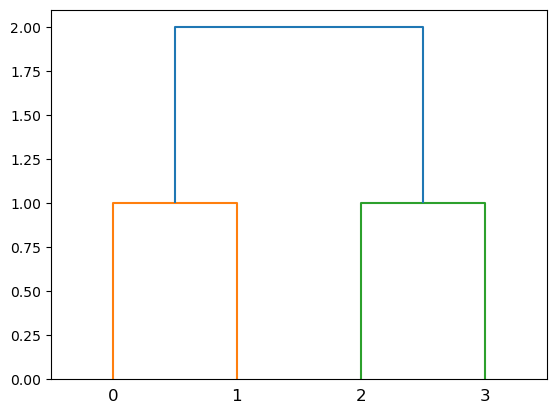

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram

def clustalw_alignment(sequences):
    # === Task 1: claclutate distance matrix by using negenive alignment score === 
    n = len(sequences)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            # write your code here
            distance = sum(el1 != el2 for el1, el2 in zip(sequences[i], sequences[j]))
            distances[i, j] = distance
            distances[j, i] = distance  # make it symmetric
    print("distance of matrix is :", distances)
    
    # === Task 2: Biuld the Tree === 
    # Convert distance matrix to condensed format (needed for scipy linkage)
    condensed_matrix = distances[np.triu_indices(len(distances), k=1)]

    # Use 'average' to approximate the NJ method with UPGMA linkage in scipy
    guide_tree = linkage(condensed_matrix, method='average')

    # Visualization of tree
    dendrogram(guide_tree)

    # === Task 3: Iterate through the guide tree and progressively align sequences === 
    aligned_sequences = []
#     # write your code here
#     aligned_sequences = progressive_alignment(sequences, Z)
    
#     print("\nAligned Sequences:")
#     for seq in aligned_sequences:
#         print(seq)+

    aligned_sequences = sequences.copy()
    
    # Process the tree and progressively align sequences
    for merge in guide_tree:
        i, j, _, _ = merge  # Indices of sequences to be merged
        seq_i, seq_j = aligned_sequences[int(i)], aligned_sequences[int(j)]
        
        # Align these two sequences using Needleman-Wunsch
        align_i, align_j = needleman_wunsch(seq_i, seq_j)
        
        # Append the aligned sequences to the list
        aligned_sequences.append(align_i)
    
    # Return the final progressive alignment (may need to adjust formatting)
    return aligned_sequences

sequences = ["ATCG", "ATCC", "ATGC", "AGGC"]
aligned_sequences = clustalw_alignment(sequences)

print("########################")
for seq in aligned_sequences:
    print(seq)
    

## Question (30 Points)
Perform a multiple sequence alignment of the Large Ribosomal Subunit Protein uL10 across different species using both the STAR and CLUSTAL W algorithms. Compare the alignment results based on sequence similarity, conservation patterns, and alignment quality.

Steps:
1. Data
    * Go to the UniProt database (https://www.uniprot.org/) and search for the following proteins:
        * RLA0_HUMAN (UniProt ID: P05388)
        * RLA0_MOUSE (UniProt ID: P14869)
        * RLA0_CHICK (UniProt ID: P47826)
        * RL10_SULAC (UniProt ID: P35023)
        * RL10_PICTO (UniProt ID: Q6L1X8)
        * RL10_HALMA (UniProt ID: P15825 )
    * Download the FASTA files for each protein sequence.
    * Use the Python function you implemented to read the FASTA files. For simplicity, extract and use only the first 100 amino acids from each sequence.

2. Multiple sequence alignment
    * Perform the multiple sequence alignment using the `clustalw_alignment` and `star_alignment` functions.
    * Compare the alignment results visually and provide a detailed discussion of your findings.

distance of matrix is : [[ 0.  0.  2. 91. 94. 92.]
 [ 0.  0.  2. 91. 94. 92.]
 [ 2.  2.  0. 91. 95. 92.]
 [91. 91. 91.  0. 93. 69.]
 [94. 94. 95. 93.  0. 86.]
 [92. 92. 92. 69. 86.  0.]]
CLUSTAL W Alignment Result:
MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MPREDRATWKSNYFMKIIQLLDDYPKCFVVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MIGLAVTTTKKIAKWKVDEVAELTEKLKTHKTIIIANIEGFPADKLHEIRKKLRGKADIKVTKNNLFNIALKNAGYDTKLFESYLTGPNAFIFTDTNPFE
MTEPAQWKIDFVKNLENEINSRKVAAIVSIKGLRNNEFQKIRNSIRDKARIKVSRARLLRLAIENTGKNNIVKLKDYAHGQVALITTDESPKKIYDILEK
MSAESERKTETIPEWKQEEVDAIVEMIESYESVGVVNIAGIPSRQLQDMRRDLHGTAELRVSRNTLLERALDDVDDGLEDLNGYITGQVGLIGTDDNPFS
MPREDRATWKSNYFLKIIQLLDDYPKCFIVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKLLPHIRGNVGFVFTKEDLTEIRD
MPREDRATWKSNYFMKIIQLLDDYPKCFVVGADNVGSKQMQQIRMSLRGKAVVLMGKNTMMRKAIRGHLENNPALEKL

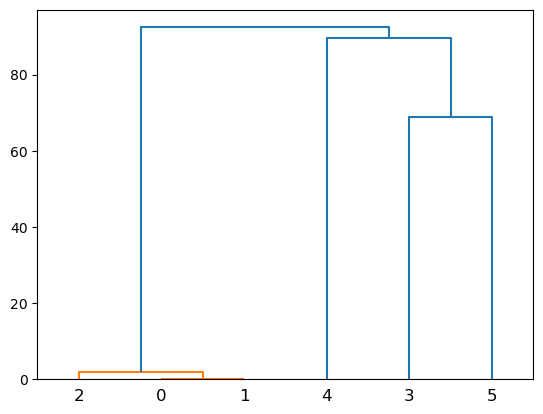

In [34]:

def extract_sequences(fasta_files, length=100):
    sequences = []
    for fasta_file in fasta_files:
        for record in SeqIO.parse(fasta_file, "fasta"):
            seq = str(record.seq)[:length]  # Extract first 100 amino acids
            sequences.append(seq)
    return sequences

# Example usage
fasta_files = ['./proteins/RLA0_HUMAN.fasta', './proteins/RLA0_MOUSE.fasta', './proteins/RLA0_CHICK.fasta',
               './proteins/RL10_SULAC.fasta', './proteins/RL10_PICTO.fasta', './proteins/RL10_HALMA.fasta']

sequences = [load_fasta(file_path)[:100] for file_path in fasta_files]
clustalw_aligned = clustalw_alignment(sequences) 
star_aligned = star_alignment(sequences, blosum62) 

print("CLUSTAL W Alignment Result:")
for seq in clustalw_aligned:
    print(seq)

print("\nSTAR Alignment Result:")
for seq in star_aligned:
    print(seq)